         house1       house2       house3       house4
0      0.000000     0.000000     0.000000     0.000000
1      0.000000     0.000000     0.000000     0.000000
2      0.000000     0.000000     0.000000     0.000000
3      0.000000     0.000000     0.000000     0.000000
4      0.000000     0.000000     0.000000     0.000000
5    361.589801   463.665391   348.243356   795.596426
6    476.835383   817.698176   817.698176   895.928981
7   1830.047019   649.928127  1511.618838  1928.869559
8   1399.615997   935.583155  1141.971842   946.517655
9   2220.874361   847.592125  2826.416135  2894.622763
10  2895.178578  2881.037360  3097.869361  1374.526332
11  2935.279324  1983.054811  1445.749443  1376.098748
12  2045.832252  3112.755287  2019.428108  3406.134673
13  3538.059387  1082.988075  1976.229478  3333.992213
14   824.599379  1463.072718  1255.587953  1093.109075
15  2120.730557  1424.515844  1084.884144  1022.527522
16  1518.568140  1122.595010  1523.937267  1553.020040
17  1111.3

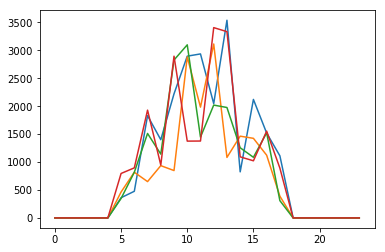

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
class PV_gen(object):

    def __init__(self,start_t=5,end_t=18,dt_time=24,max_pv=4000,min_pv=1000):
        self.start_t=start_t
        self.end_w=end_t
        self.dt_time=dt_time
        self.max_pv=max_pv
        self.min_pv=min_pv
        self.start_data=0
        self._data_init()
        
    def _data_init(self):
        bins=[-0.30051769, -0.27382177, -0.24712585, -0.22042993, -0.19373401, -0.16703809, -0.14034217,
              -0.11364625, -0.08695033, -0.06025441, -0.0335585,  -0.00686258, 0.01983334,  0.04652926,
              0.07322518,  0.0999211,   0.12661702,  0.15331294, 0.18000886,  0.20670478 , 0.23340069,
              0.26009661,  0.28679253,  0.31348845]
        start_zero=list(np.zeros(self.start_t))
        mid_one=list(np.ones(self.end_w-self.start_t))
        last_zero=list(np.zeros(self.dt_time-self.end_w))
        self.start_data=start_zero+mid_one+last_zero
        mu, sigma = 0, 0.1
        a=[]
        for i in range(24):
            a.append(1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins[i] - mu)**2 / (2 * sigma**2) ))
        a=np.array(a)
        self.start_data= np.array(self.start_data)*a/4
    
    def _datas(self,_head):
        """create data for load"""
        data={}
        pv=np.random.randint(self.min_pv,self.max_pv,size=self.dt_time)
        pv=pv*self.start_data
        data[_head]=pv
        return pd.DataFrame(data,columns= [_head])
    
    def _data(self,cols):
        load_cols=[]
        for col in range(len(cols)):
            if len(load_cols)==0:
                load_data=self._datas(cols[col]) 
                load_cols.append(load_data.columns[0])
            else:
                load_datas=self._datas(cols[col]) 
                if load_datas.columns[0] not in load_cols:
                    load_cols.append(load_datas.columns[0])
                    load_data=load_data.join(load_datas)
                    
        return load_data
    
pv=PV_gen()
pv_p=pv._data(["house1","house2",'house3','house4'])
print(pv_p)
plt.plot(pv_p)

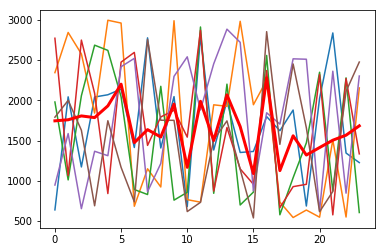

In [18]:
class Load_gen(object):

    def __init__(self,low_w=500,high_w=3000,dt_time=24):
        self.low_w=low_w
        self.high_w=high_w
        self.dt_time=dt_time

    def _datas(self,_head):
        """create data for load"""
        data={}
        load=np.random.randint(self.low_w,self.high_w,size=self.dt_time)
        data[_head]=load
        return pd.DataFrame(data,columns= [_head])
    
    def _data(self,cols):
        load_cols=[]
        for col in range(len(cols)):
            if len(load_cols)==0:
                load_data=self._datas(cols[col]) 
                load_cols.append(load_data.columns[0])
            else:
                load_datas=self._datas(cols[col]) 
                if load_datas.columns[0] not in load_cols:
                    load_cols.append(load_datas.columns[0])
                    load_data=load_data.join(load_datas)
                    
        return load_data
load=Load_gen()
load_data=load._data(['house1','house2','house3','house4','hosue5','house7'])
avg=load_data.mean(axis=1)
plt.plot(load_data)
plt.plot(avg,color="r",linewidth=3.0)